In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import matplotlib_inline


In [2]:
df_test = pd.read_csv("test_data.csv")
df_train = pd.read_csv("train_data.csv")

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df_train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [6]:
df_train['Hospital_code'] = df_train['Hospital_code'].astype('str')
df_train['City_Code_Hospital'] = df_train['City_Code_Hospital'].astype('str')
df_train['Bed Grade'] = df_train['Bed Grade'].astype('Int64')
df_train['City_Code_Patient'] = df_train['City_Code_Patient'].astype('str')

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  object 
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  object 
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  Int64  
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3184

In [8]:
df_train[['City_Code_Patient']].value_counts()

City_Code_Patient
8.0                  124011
2.0                   38869
1.0                   26377
7.0                   23807
5.0                   20079
4.0                   15380
9.0                   11795
15.0                   8950
10.0                   8174
6.0                    6005
12.0                   5647
nan                    4532
3.0                    3772
23.0                   3698
14.0                   2927
16.0                   2254
13.0                   1625
21.0                   1602
20.0                   1409
18.0                   1404
19.0                   1028
26.0                   1023
25.0                    798
27.0                    771
11.0                    658
28.0                    521
22.0                    405
24.0                    360
30.0                    133
29.0                     98
33.0                     78
31.0                     59
37.0                     57
32.0                     52
34.0                     46
35

In [9]:
df_test['Hospital_code'] = df_test['Hospital_code'].astype('str')
df_test['City_Code_Hospital'] = df_test['City_Code_Hospital'].astype('str')
df_test['Bed Grade'] = df_test['Bed Grade'].astype('Int64')
df_test['City_Code_Patient'] = df_test['City_Code_Patient'].astype('str')

In [10]:
df_test.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,318439,21,c,3,Z,3,gynecology,S,A,2,17006,2.0,Emergency,Moderate,2,71-80,3095.0
1,318440,29,a,4,X,2,gynecology,S,F,2,17006,2.0,Trauma,Moderate,4,71-80,4018.0
2,318441,26,b,2,Y,3,gynecology,Q,D,4,17006,2.0,Emergency,Moderate,3,71-80,4492.0
3,318442,6,a,6,X,3,gynecology,Q,F,2,17006,2.0,Trauma,Moderate,3,71-80,4173.0
4,318443,28,b,11,X,2,gynecology,R,F,2,17006,2.0,Trauma,Moderate,4,71-80,4161.0


In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137057 entries, 0 to 137056
Data columns (total 17 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            137057 non-null  int64  
 1   Hospital_code                      137057 non-null  object 
 2   Hospital_type_code                 137057 non-null  object 
 3   City_Code_Hospital                 137057 non-null  object 
 4   Hospital_region_code               137057 non-null  object 
 5   Available Extra Rooms in Hospital  137057 non-null  int64  
 6   Department                         137057 non-null  object 
 7   Ward_Type                          137057 non-null  object 
 8   Ward_Facility_Code                 137057 non-null  object 
 9   Bed Grade                          137022 non-null  Int64  
 10  patientid                          137057 non-null  int64  
 11  City_Code_Patient                  1370

In [12]:
print('shape of training data set: ', df_train.shape)
print('shape of test data set: ', df_test.shape)

shape of training data set:  (318438, 18)
shape of test data set:  (137057, 17)


In [13]:
df_train[['patientid']].nunique()

patientid    92017
dtype: int64

In [14]:
print('Shape of dataset : ',df_train.shape)
df_train.describe()

Shape of dataset :  (318438, 18)


,case_id,Available Extra Rooms in Hospital,Bed Grade,patientid,Visitors with Patient,Admission_Deposit
count,318438.000000,318438.000000,318325.0,318438.000000,318438.000000,318438.000000
mean,159219.500000,3.197627,2.625807,65747.579472,3.284099,4880.749392
std,91925.276848,1.168171,0.873146,37979.936440,1.764061,1086.776254
min,1.000000,0.000000,1.0,1.000000,0.000000,1800.000000
25%,79610.250000,2.000000,2.0,32847.000000,2.000000,4186.000000
50%,159219.500000,3.000000,3.0,65724.500000,3.000000,4741.000000
75%,238828.750000,4.000000,3.0,98470.000000,4.000000,5409.000000
max,318438.000000,24.000000,4.0,131624.000000,32.000000,11008.000000


In [15]:
print('Shape of dataset : ',df_test.shape)
df_test.describe()

Shape of dataset :  (137057, 17)


,case_id,Available Extra Rooms in Hospital,Bed Grade,patientid,Visitors with Patient,Admission_Deposit
count,137057.000000,137057.000000,137022.0,137057.000000,137057.000000,137057.000000
mean,386967.000000,3.192686,2.634489,65877.903515,3.284531,4869.731097
std,39565.092259,1.164250,0.869295,37942.997623,1.777270,1080.766723
min,318439.000000,0.000000,1.0,3.000000,0.000000,1800.000000
25%,352703.000000,2.000000,2.0,32945.000000,2.000000,4178.000000
50%,386967.000000,3.000000,3.0,65786.000000,3.000000,4731.000000
75%,421231.000000,4.000000,3.0,98851.000000,4.000000,5398.000000
max,455495.000000,21.000000,4.0,131618.000000,32.000000,11920.000000


In [16]:
df_train.isnull().sum().any()

True

In [17]:
df_train.loc[:, df_train.isna().any()].isna().sum().sort_values(ascending=False)

Bed Grade    113
dtype: int64

In [18]:
df_test.loc[:, df_test.isna().any()].isna().sum().sort_values(ascending=False)

Bed Grade    35
dtype: int64

In [19]:
df_train.isnull().sum().sort_values(ascending=False)

Bed Grade                            113
Hospital_code                          0
Admission_Deposit                      0
Age                                    0
Visitors with Patient                  0
Severity of Illness                    0
Type of Admission                      0
City_Code_Patient                      0
patientid                              0
case_id                                0
Ward_Facility_Code                     0
Ward_Type                              0
Department                             0
Available Extra Rooms in Hospital      0
Hospital_region_code                   0
City_Code_Hospital                     0
Hospital_type_code                     0
Stay                                   0
dtype: int64

<Axes: >

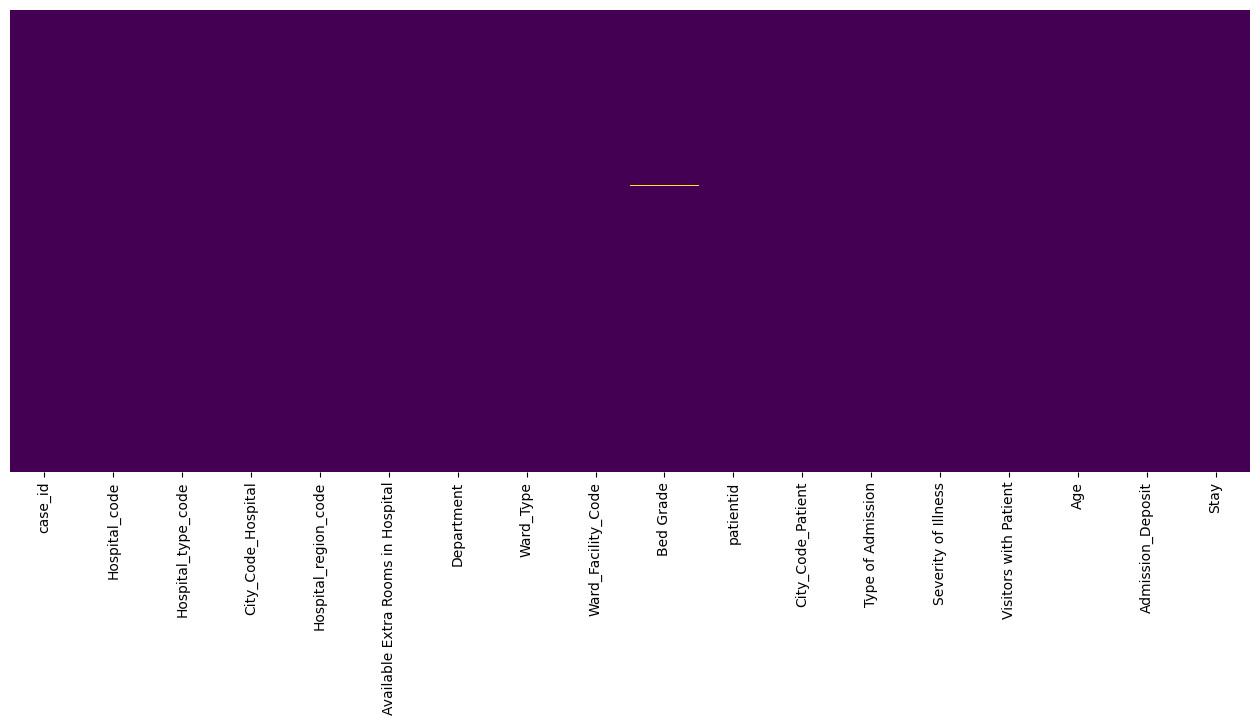

In [23]:
plt.figure(figsize = (16,6))
sns.heatmap(df_train.isnull(), yticklabels= False, cbar= False, cmap='viridis')

<Axes: >

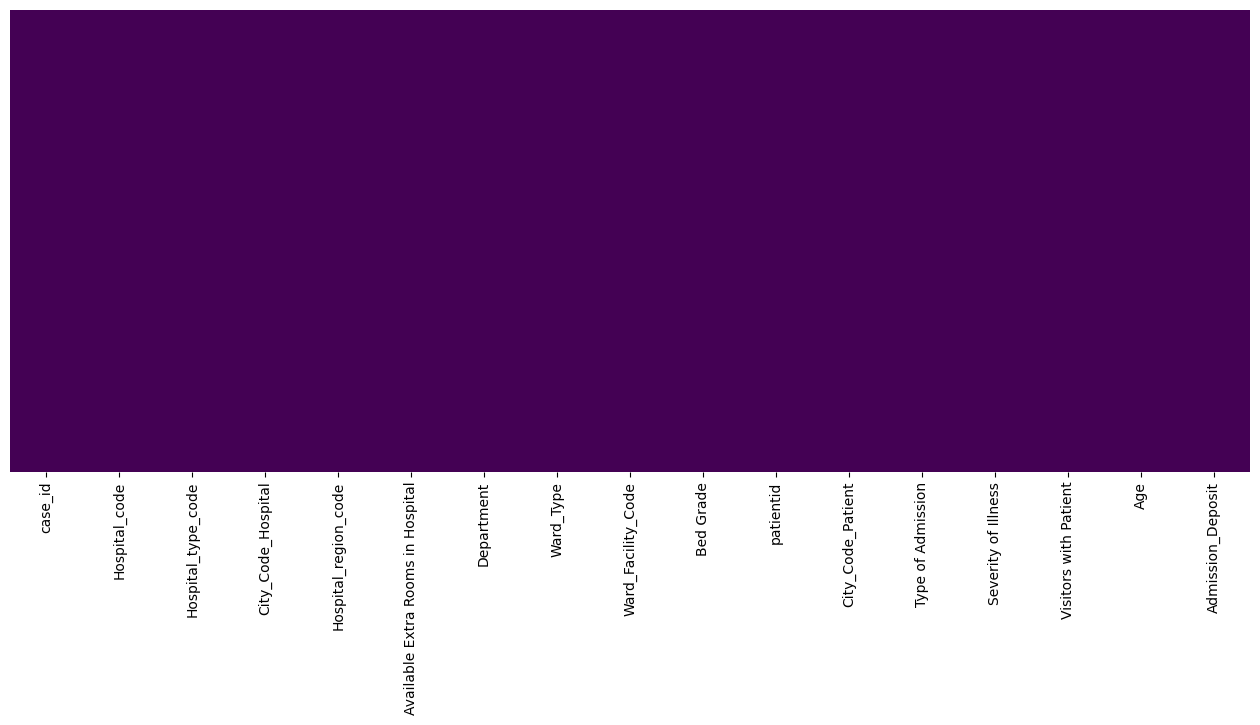

In [20]:
plt.figure(figsize = (16,6))
sns.heatmap(df_test.isnull(), yticklabels= False, cbar= False, cmap='viridis')

In [25]:
df_test.isnull().sum().any()

True

In [21]:
missing_perc = (df_train.isnull().sum()/len(df_train)*100).sort_values(ascending=False)
missing_perc[missing_perc != 0]

Bed Grade    0.035486
dtype: float64

Text(0.5, 1.0, 'Percentage of Missing Values in each columns')

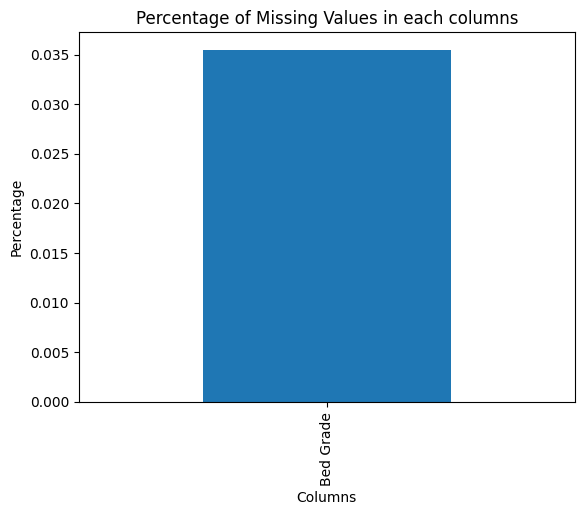

In [27]:
missing_perc[missing_perc != 0].plot(kind='bar')
plt.xlabel("Columns")
plt.ylabel("Percentage")
plt.title('Percentage of Missing Values in each columns')

In [22]:
missing_perc_test = (df_test.isnull().sum()/len(df_test)*100).sort_values(ascending=False)
missing_perc_test[missing_perc_test != 0]

Bed Grade    0.025537
dtype: float64

Text(0.5, 1.0, 'Percentage of Missing Values in each columns')

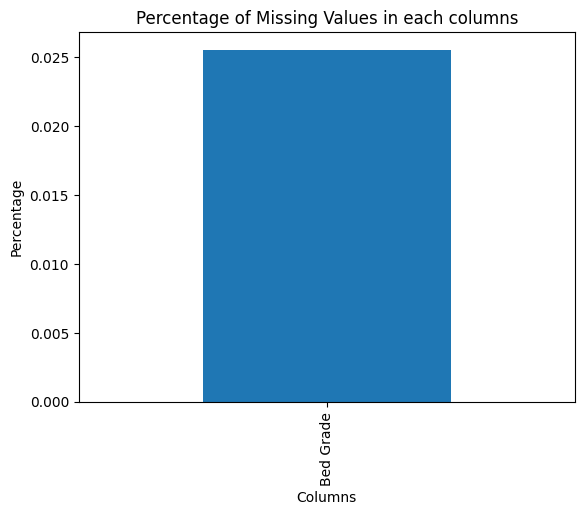

In [23]:
missing_perc_test[missing_perc_test != 0].plot(kind='bar')
plt.xlabel("Columns")
plt.ylabel("Percentage")
plt.title('Percentage of Missing Values in each columns')

In [24]:
df_train.duplicated(subset=df_train.columns.difference(['case_id'])).any()

True

In [25]:
df_train.duplicated(subset=df_train.columns.difference(['case_id'])).sum()

65

In [26]:
df_train.duplicated(subset=df_train.columns).sum()

0

In [27]:
df_test.duplicated(subset=df_test.columns.difference(['case_id'])).sum()

28

In [28]:
df_train[df_train.duplicated(subset=df_train.columns.difference(['case_id']), keep=False)]

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
1178,1179,28,b,11,X,2,gynecology,R,F,4,42891,8.0,Trauma,Moderate,4,81-90,4944.0,31-40
1179,1180,28,b,11,X,2,gynecology,R,F,4,42891,8.0,Trauma,Moderate,4,81-90,4944.0,31-40
2355,2356,13,a,5,Z,4,anesthesia,R,F,4,64276,1.0,Trauma,Extreme,3,41-50,4025.0,71-80
2356,2357,13,a,5,Z,4,anesthesia,R,F,4,64276,1.0,Trauma,Extreme,3,41-50,4025.0,71-80
2357,2358,23,a,6,X,2,anesthesia,R,F,2,64276,1.0,Urgent,Extreme,6,41-50,3538.0,51-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298232,298233,23,a,6,X,2,gynecology,Q,F,4,82567,8.0,Trauma,Minor,8,51-60,4181.0,More than 100 Days
298233,298234,23,a,6,X,2,gynecology,Q,F,4,82567,8.0,Trauma,Minor,8,51-60,4181.0,More than 100 Days
298234,298235,23,a,6,X,2,gynecology,Q,F,4,82567,8.0,Trauma,Minor,8,51-60,4181.0,More than 100 Days
304085,304086,22,g,9,Y,1,TB & Chest disease,S,B,1,50413,6.0,Urgent,Moderate,4,31-40,5317.0,21-30


In [29]:
df_train.drop_duplicates(subset=df_train.columns.difference(['case_id']), inplace=True)
print(df_train.shape)
df_train.head()

(318373, 18)


,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [30]:
df_train['Stay'].value_counts().sort_index()

0-10                  23599
11-20                 78135
21-30                 87488
31-40                 55152
41-50                 11743
51-60                 35000
61-70                  2744
71-80                 10246
81-90                  4836
91-100                 2764
More than 100 Days     6666
Name: Stay, dtype: int64

In [31]:
df_train[['Stay','Age']].value_counts().sort_index()

Stay                Age   
0-10                0-10       615
                    11-20     1552
                    21-30     3467
                    31-40     4913
                    41-50     4726
                              ... 
More than 100 Days  51-60     1194
                    61-70      889
                    71-80     1060
                    81-90      322
                    91-100      63
Length: 110, dtype: int64

In [32]:
df_train['Age'].value_counts().sort_index()

0-10       6254
11-20     16765
21-30     40838
31-40     63630
41-50     63739
51-60     48504
61-70     33678
71-80     35781
81-90      7884
91-100     1300
Name: Age, dtype: int64

In [33]:
df_train['Severity of Illness'].value_counts()

Moderate    175806
Minor        85859
Extreme      56708
Name: Severity of Illness, dtype: int64

In [34]:
df_train['Department'].value_counts()

gynecology            249443
anesthesia             29641
radiotherapy           28508
TB & Chest disease      9581
surgery                 1200
Name: Department, dtype: int64

In [35]:
df_train['Ward_Type'].value_counts()

R    127916
Q    106159
S     77766
P      5046
T      1477
U         9
Name: Ward_Type, dtype: int64

In [36]:
df_train['Bed Grade'].value_counts().sort_index()

1     26497
2    123654
3    110564
4     57545
Name: Bed Grade, dtype: Int64

In [37]:
for column in df_train.columns:
    unique_values = df_train[column].unique()
    type_value = df_train[column].dtype
    if len(unique_values) > 10:
        unique_values = unique_values[:10]
    total_unique_values = df_train[column].nunique()
    print(f"Data Type of {column}: {type_value}")
    print(f"Total Unique values in {column}: {total_unique_values}")
    if (df_train[column].dtype == 'int64') or (df_train[column].dtype == 'float64'):
       print(f"Minimum value: {df_train[column].min()},   Maximum value: {df_train[column].max()}")
    print(f"Unique values in {column}: {unique_values}\n")

Data Type of case_id: int64
Total Unique values in case_id: 318373
Minimum value: 1,   Maximum value: 318438
Unique values in case_id: [ 1  2  3  4  5  6  7  8  9 10]

Data Type of Hospital_code: object
Total Unique values in Hospital_code: 32
Unique values in Hospital_code: ['8' '2' '10' '26' '23' '32' '1' '22' '16' '9']

Data Type of Hospital_type_code: object
Total Unique values in Hospital_type_code: 7
Unique values in Hospital_type_code: ['c' 'e' 'b' 'a' 'f' 'd' 'g']

Data Type of City_Code_Hospital: object
Total Unique values in City_Code_Hospital: 11
Unique values in City_Code_Hospital: ['3' '5' '1' '2' '6' '9' '10' '4' '11' '7']

Data Type of Hospital_region_code: object
Total Unique values in Hospital_region_code: 3
Unique values in Hospital_region_code: ['Z' 'X' 'Y']

Data Type of Available Extra Rooms in Hospital: int64
Total Unique values in Available Extra Rooms in Hospital: 18
Minimum value: 0,   Maximum value: 24
Unique values in Available Extra Rooms in Hospital: [ 3  2

Admission_Deposit
Minimum value: 1800.0,   Maximum value: 11008.0
Skew : 0.93


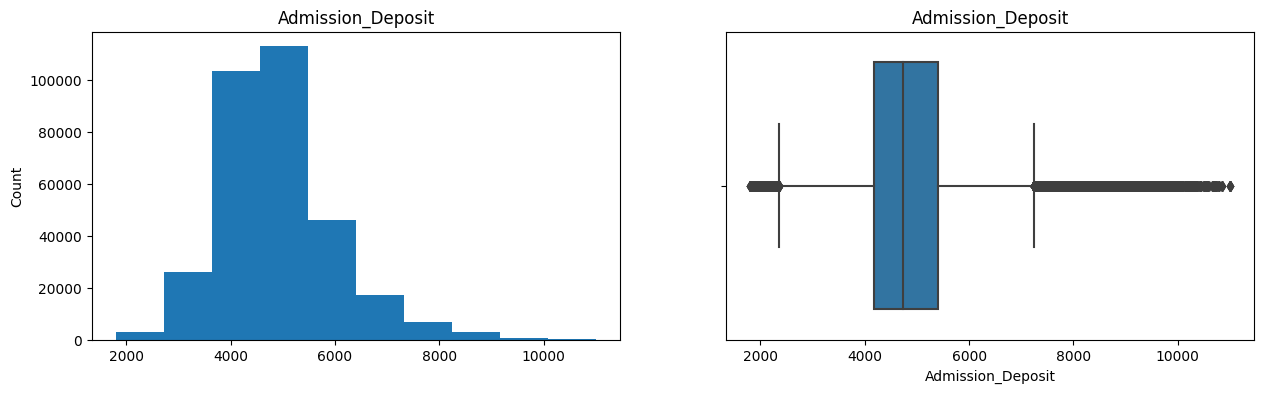

Available Extra Rooms in Hospital
Minimum value: 0,   Maximum value: 24
Skew : 0.97


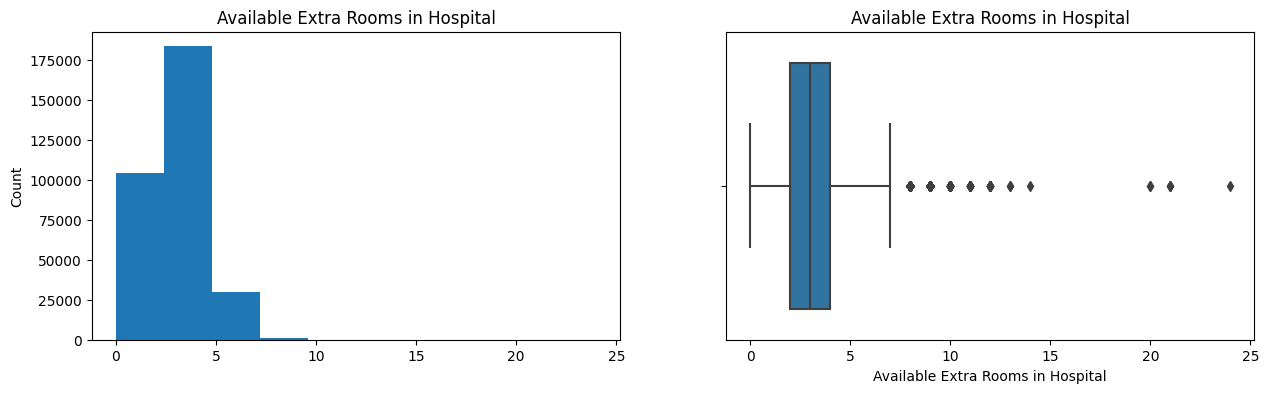

Bed Grade
Minimum value: 1,   Maximum value: 4
Skew : 0.05


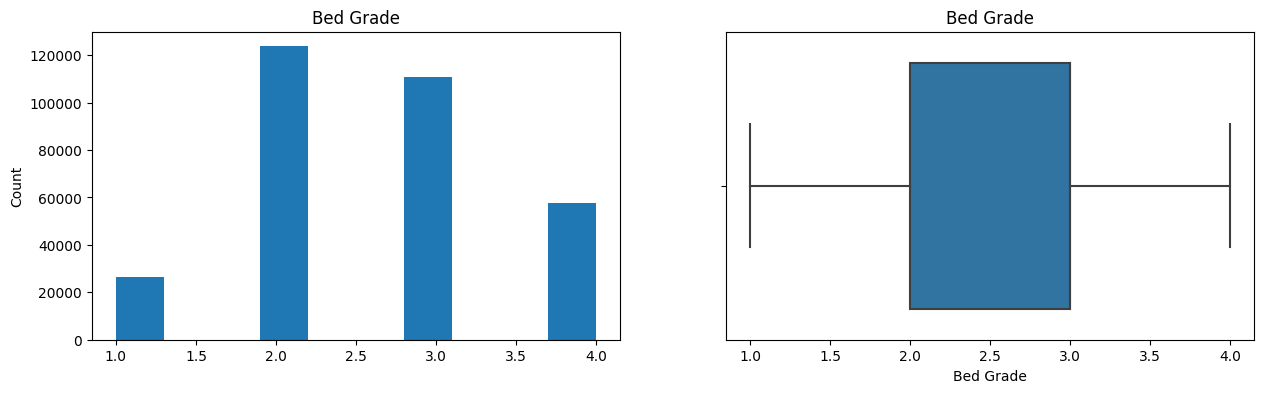

Visitors with Patient
Minimum value: 0,   Maximum value: 32
Skew : 3.14


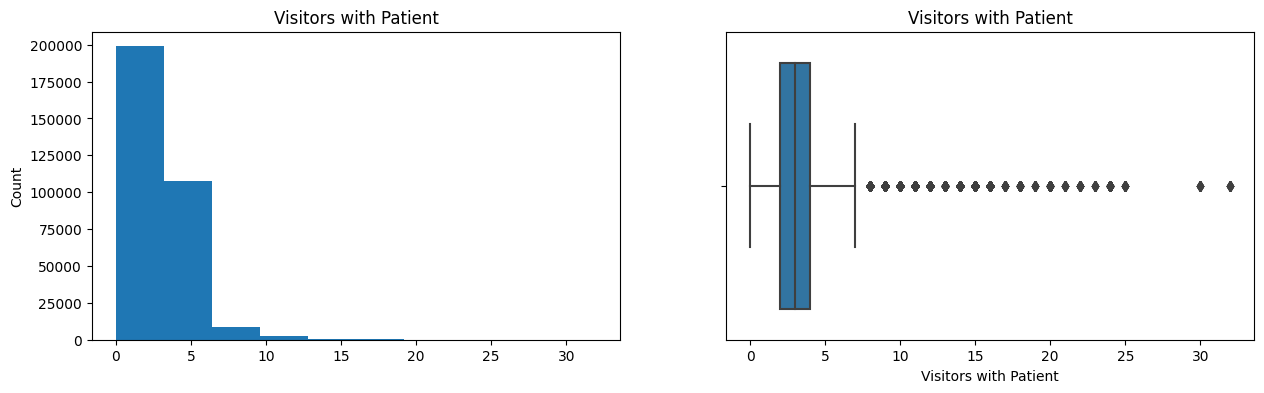

In [38]:
num_col_train = df_train.select_dtypes(include=np.number).columns.difference(['case_id','patientid'])
cat_col_train = df_train.select_dtypes(include=['object','category']).columns
# Visualize Numerical columns

for col in num_col_train:
    print(col)
    print(f"Minimum value: {df_train[col].min()},   Maximum value: {df_train[col].max()}")  
    print('Skew :', round(df_train[col].skew(),2))
    plt.figure(figsize = (15,4))
    plt.subplot(1,2,1)
    df_train[col].hist(grid = False)
    # sns.histplot(data=df_train, x=df_train[col], kde=True)
    plt.ylabel('Count')
    plt.title(col)
    plt.subplot(1,2,2)
    plt.title(col)
    sns.boxplot(x=df_train[col])
    plt.show()

In [39]:
print(cat_col_train)
for i,col in enumerate(cat_col_train):
    print(df_train[col].value_counts())
    print('\n')

Index(['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code',
       'City_Code_Patient', 'Type of Admission', 'Severity of Illness', 'Age',
       'Stay'],
      dtype='object')
26    33075
23    26553
19    21210
6     20421
14    17328
11    17327
28    17135
27    14242
9     11510
29    11307
12    11295
32    10703
25     9833
10     9433
15     9256
21     8147
24     7992
3      7110
17     5501
5      5261
1      5246
13     5231
2      5100
30     5002
22     4275
31     3967
16     3671
8      3663
18     3630
20     1405
7      1305
4      1239
Name: Hospital_code, dtype: int64


a    143384
b     68942
c     45916
e     24767
d     20386
f     10703
g      4275
Name: Hospital_type_code, dtype: int64


1     55348
2     51807
6     46974
7     35452
3     31560
5     31097
9     26273
11    17135
4     13851
10     5246
13     3630
Name: City_Code_Hospital, dtype: int64


X    133308
Y    

Categorical Columns are : Index(['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code',
       'City_Code_Patient', 'Type of Admission', 'Severity of Illness', 'Age',
       'Stay'],
      dtype='object')


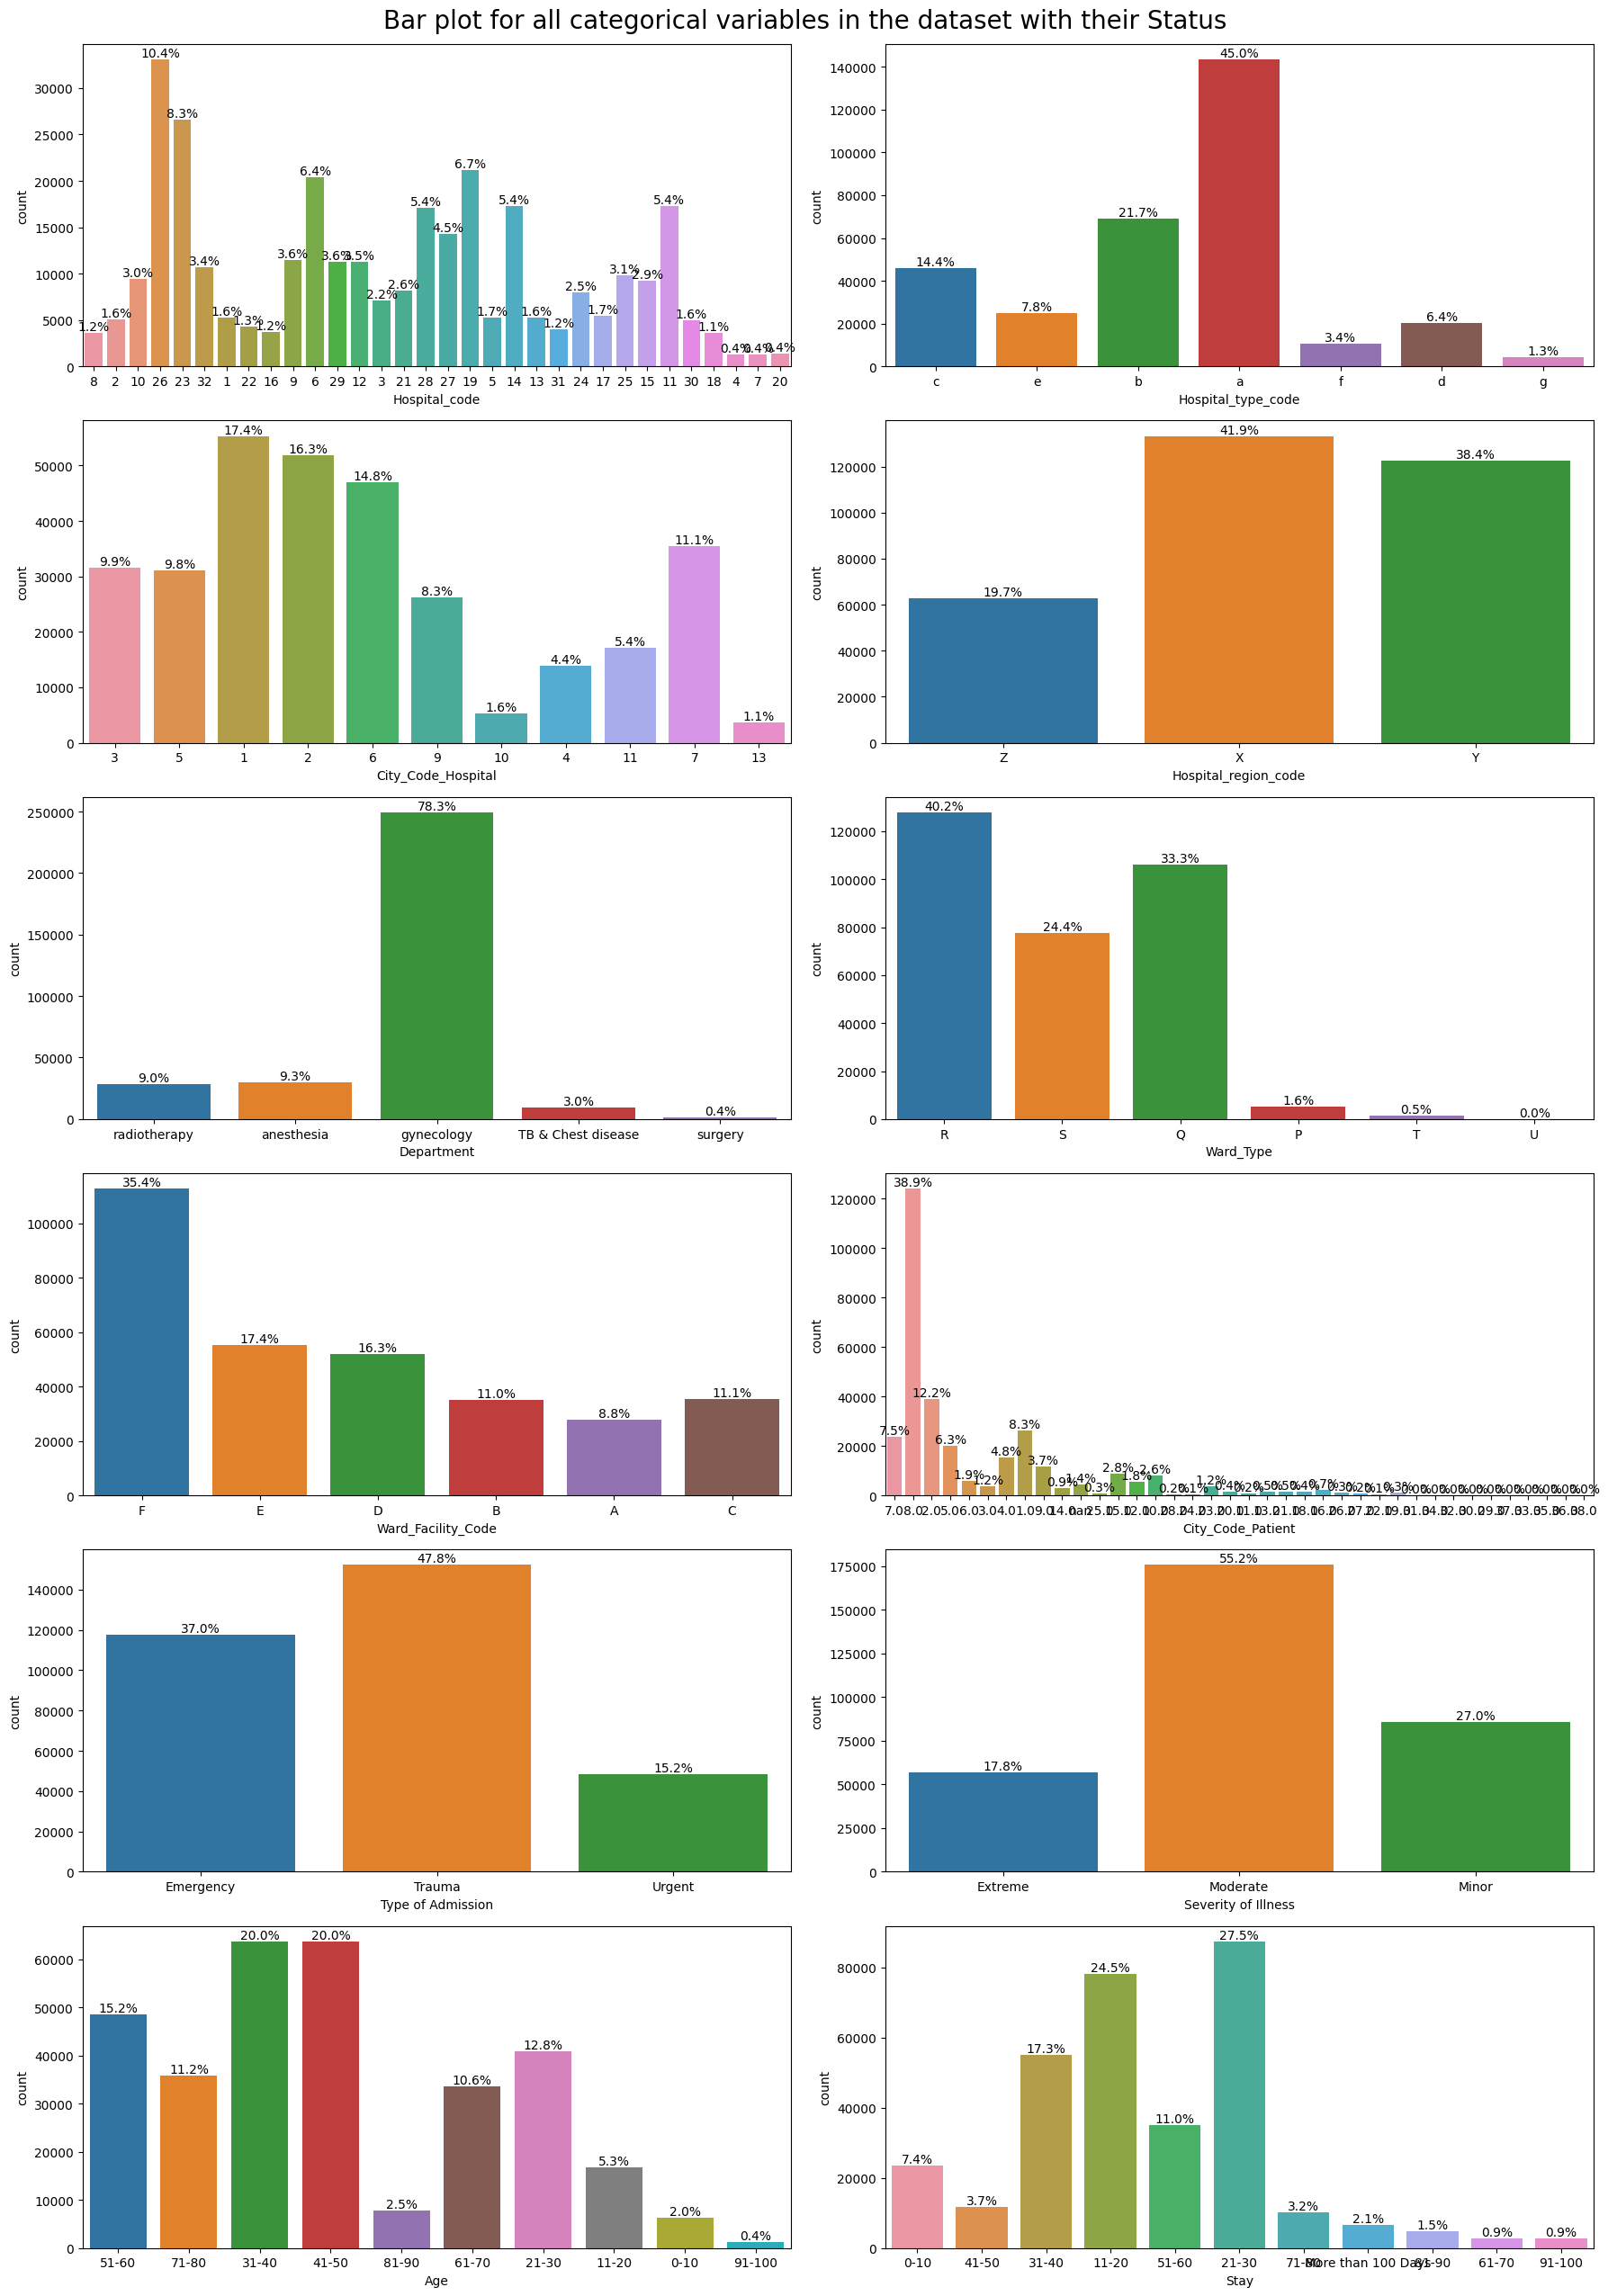

In [40]:
cat_col_train = df_train.select_dtypes(include=['object','category']).columns
print(f"Categorical Columns are : {cat_col_train}")
# Visualize Categorical columns 
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(18, 26))
# Increase vertical spacing
plt.subplots_adjust(hspace=0.5)
# Set the supertitle
fig.suptitle('Bar plot for all categorical variables in the dataset with their Status\n', fontsize=20)
# Adjust the spacing between the supertitle and subplots
plt.subplots_adjust(top=0.95)
# Iterate over the columns and create count plots
for i, column in enumerate(cat_col_train):
    row = i // 2
    col = i % 2
    sns.countplot(ax=axes[row, col], x=column, data=df_train) # , hue='Stay')
   
    total_count = len(df_train[column])

    for p in axes[row,col].patches:
        percentage = f'{100 * p.get_height() / total_count:.1f}%'
        x_pos = p.get_x() + p.get_width() / 2
        y_pos = p.get_height()
        axes[row,col].annotate(percentage, (x_pos, y_pos), ha='center', va='bottom')
# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

<Axes: >

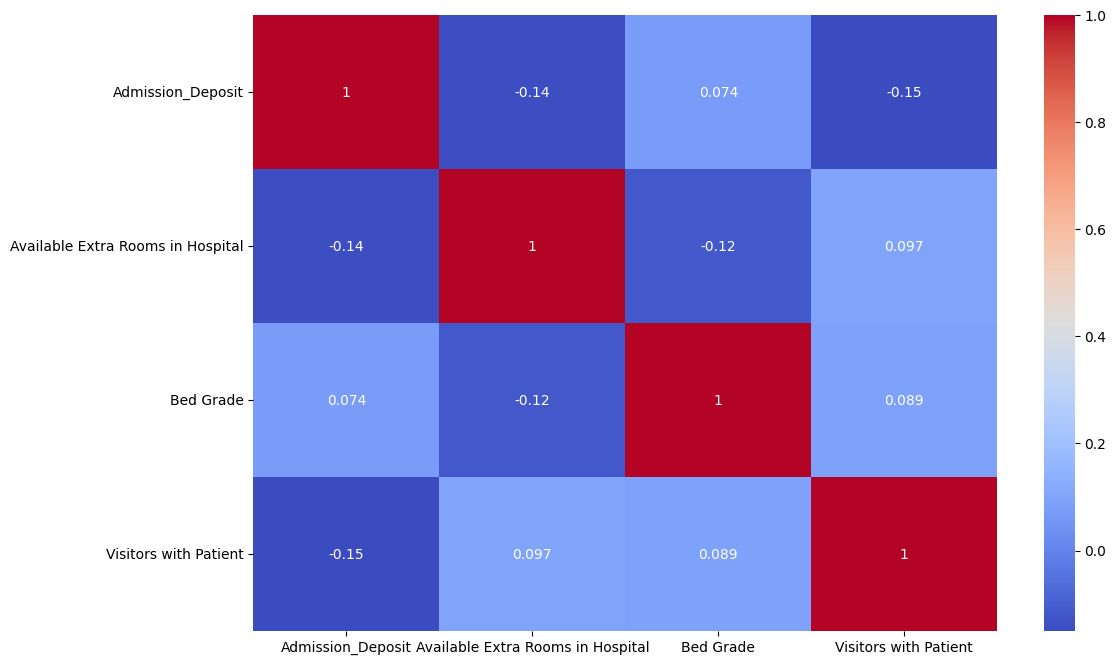

In [41]:
plt.figure(figsize=(12,8))
sns.heatmap(df_train[num_col_train].corr(),cbar = True, cmap='coolwarm', annot=True)

In [42]:
import plotly.express as px
# piechart

df_pie = df_train['Stay'].value_counts().reset_index()
df_pie.columns = ['Stay', 'count']
fig_pie = px.pie(df_pie, values='count', names='Stay', title="Pie Plot showing distribution of the Length of Stay in the Hospital") 

fig_pie.show()


In [43]:
df_train.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

In [44]:
fig = px.sunburst(df_train, 
                  path=['Severity of Illness', 'Type of Admission','Department','Ward_Type', 'Stay'], 
                  values='Bed Grade' , color='Type of Admission', title="Chart shows the distribution of the Status ")
fig.update_layout(width = 800, height= 800)
# Show the plot
fig.show()

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, log_loss, make_scorer

In [46]:
from sklearn.model_selection import train_test_split

X_train = df_train.drop(['Stay', 'case_id','patientid'], axis=1)  
y_train = df_train['Stay']  

X_test = df_test.drop(['case_id','patientid'], axis=1) 

In [48]:
num_col = X_train.select_dtypes(include=np.number).columns
cat_col = X_train.select_dtypes(include=['object']).columns

In [49]:
models = { 
          'DecisionTreeClassifier' : (DecisionTreeClassifier(), {'criterion' : ['gini'],'max_depth': [None], 'splitter': ['best']}),
          'RandomForestClass' : (RandomForestClassifier(n_jobs= -1), {'criterion' : ['gini'],'n_estimators': [10,100], 'max_depth': [None]}),
          'AdaBoostClassifier' : (AdaBoostClassifier(), {'n_estimators': [10,100], 'algorithm': ['SAMME', 'SAMME.R']}),       
          }

# Define the column transformer for preprocessing
preprocessing = ColumnTransformer(
    transformers=[
        ('numeric', StandardScaler(), num_col),  # Replace with actual numeric column names
        ('categorical', OneHotEncoder(), cat_col)  # Replace with actual categorical column name
    ])

# LogLoss = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

for name, (model, params) in models.items():
    # create a pipline
    # pipeline = GridSearchCV(model, params, cv=5)
    pipeline = Pipeline([
     ('preprocess', preprocessing),
     ('Imputer', SimpleImputer()),
     ('classify', GridSearchCV(model, params, cv=5, verbose=3))
    ])
    # fit the pipeline
    pipeline.fit(X_train, y_train)
    
    # make prediction from each model
    y_pred = pipeline.predict(X_test)
    
    y_pred_prob = pipeline.predict_proba(X_test)
    # print the performing metric
    # Calculate accuracy
    print(f"Model Name: {name}")
    print("Best Parameters: ", pipeline.named_steps['classify'].best_params_)
    print("Best Score: ", pipeline.named_steps['classify'].best_score_)
    print("Best Estimator: ", pipeline.named_steps['classify'].best_estimator_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END criterion=gini, max_depth=None, splitter=best;, score=0.301 total time= 4.7min
[CV 2/5] END criterion=gini, max_depth=None, splitter=best;, score=0.297 total time= 3.7min
[CV 3/5] END criterion=gini, max_depth=None, splitter=best;, score=0.297 total time= 2.8min
[CV 4/5] END criterion=gini, max_depth=None, splitter=best;, score=0.297 total time= 2.9min
[CV 5/5] END criterion=gini, max_depth=None, splitter=best;, score=0.284 total time= 2.3min
Model Name: DecisionTreeClassifier
Best Parameters:  {'criterion': 'gini', 'max_depth': None, 'splitter': 'best'}
Best Score:  0.2951254996757322
Best Estimator:  DecisionTreeClassifier()
Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END criterion=gini, max_depth=None, n_estimators=10;, score=0.343 total time= 8.0min
[CV 2/5] END criterion=gini, max_depth=None, n_estimators=10;, score=0.341 total time= 8.3min
[CV 3/5] END criterion=gini, max_depth=None, 